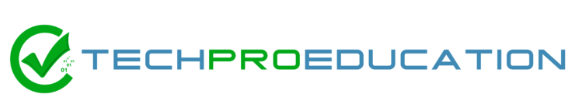

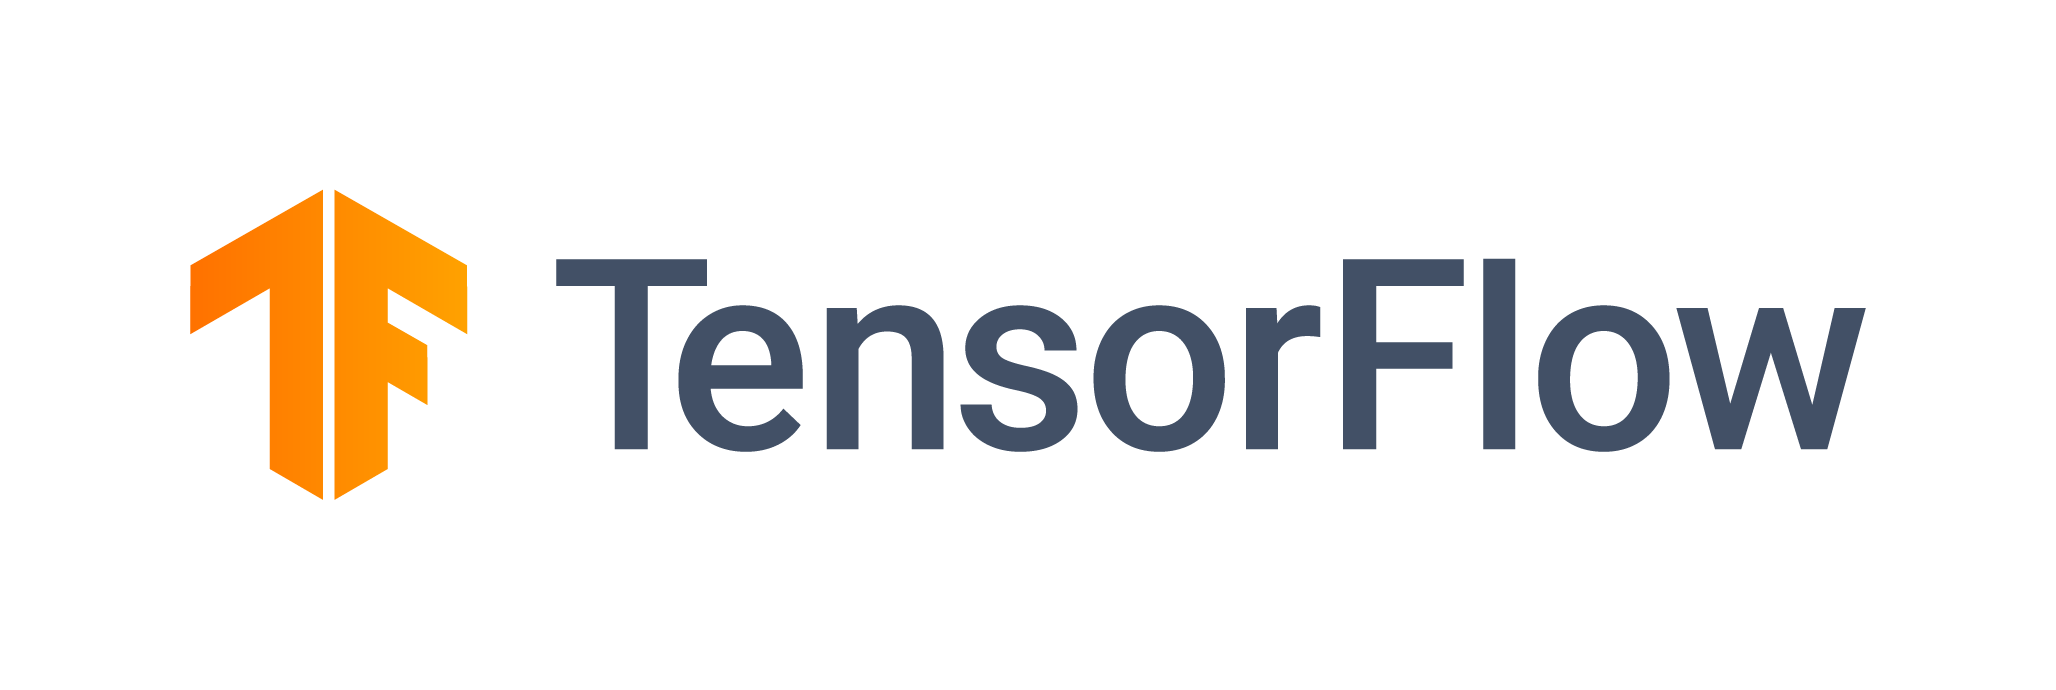

**TensorFlow**, Google tarafından geliştirilen ve sürdürülen açık kaynaklı bir derin öğrenme kitaplığıdır. Bir dizi makine öğrenimi görevini gerçekleştiren veri akışı programlaması sunar. 

TensorFlow’un esnek yapısı, tek API (Application Programming İnterface), uygulama programlama arayüzü ile tüm platformlarda hesapların yapılmasını sağlamaktadır. 

TensorFlow, bir ya da daha fazla merkezi işlem birimi (CPU) ve grafik işlemlerini yürüten işlemcileri (GPU) kullanarak, harekete geçirme, konuşlandırma (Deploy etme) işlemlerinin yapılmasını yürütmektedir. Temelinde Python programlama dili kullanımı ile geliştirilmiş olan TensorFlow’un, günümüz uygulamalarında Python dışında C++, Java, C#, JavaScript gibi birçok farklı programlama dilini de desteklediği görülmektedir. 

JavaScript desteğiyle, TensorFlow.js ile internet tarayıcıları üzerinden yapay zekâ konularını içeren birçok işlem de yapılabilmektedir. 

**KERAS** , Theano veya Tensorflow'un üzerinde çalışan, Python'da yazılmış bir Açık Kaynak Sinir Ağı kitaplığıdır. Modüler, hızlı ve kullanımı kolay olacak şekilde tasarlanmıştır. Bir Google mühendisi olan François Chollet tarafından geliştirilmiştir. Herhangi bir derin öğrenme algoritması oluşturmak için kullanışlı bir kütüphanedir.

# Installing Tensorflow

In [1]:
pip install keras

In [2]:
pip install tensorflow

In [1]:
import tensorflow as tf
tf.__version__

'2.16.1'

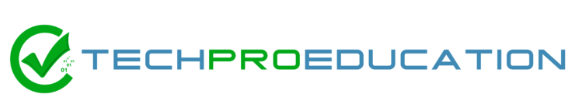

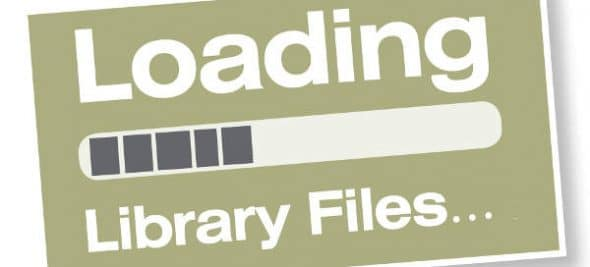

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show") 

# Uyarı mesajlarını göstermemek için uyarı filtresi uygular. 
# Bu, kodu çalıştırdığınızda uyarı mesajlarının görünmesini engeller.


plt.rcParams["figure.figsize"] = (10,6)
# Matplotlib kütüphanesindeki grafik boyutlarını (figür boyutu) ayarlar. 
# Burada (10,6), genişliği 10 ve yüksekliği 6 birim olan bir çerçeve boyutu belirtilir.

sns.set_style("whitegrid")
# Seaborn kütüphanesindeki grid görünümünü beyaz bir arka planla ayarlar.

pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pandas kütüphanesindeki float formatını ayarlar. 
# Burada lambda fonksiyonu kullanılarak, ondalık sayıların görüntülenme formatı ayarlanır.

pd.set_option('display.max_rows', None)
# veri çerçevelerindeki tüm satırların görüntülenmesini istemiyorsanız, display.max_rows seçeneğini None olarak ayarlar.

pd.set_option('display.max_columns', None)
# veri çerçevelerindeki tüm sütunların görüntülenmesini istemiyorsanız, display.max_columns seçeneğini None olarak ayarlar.


In [3]:
df = pd.read_csv("fake_reg.csv")

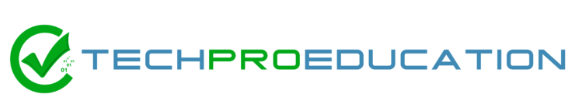

## Exploratory Data Analysis and Visualization

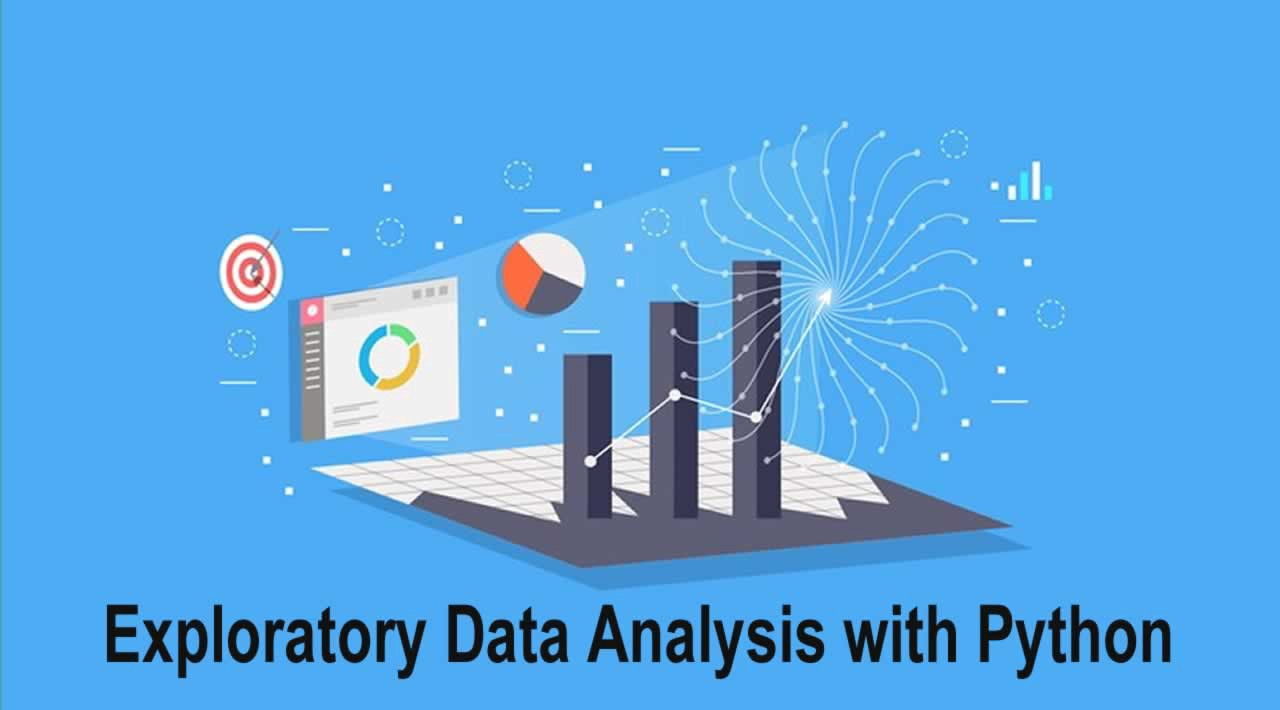

In [4]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [5]:
df.tail()

,price,feature1,feature2
995,476.526,1000.019,999.673
996,457.313,998.855,1000.020
997,456.721,1001.452,998.848
998,403.316,1000.771,998.563
999,599.367,999.232,1001.451


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [7]:
df.describe()

,price,feature1,feature2
count,1000.000,1000.000,1000.000
mean,498.673,1000.014,999.980
std,93.785,0.974,0.948
min,223.347,997.058,996.996
25%,433.026,999.332,999.316
50%,502.382,1000.010,1000.002
75%,564.922,1000.638,1000.645
max,774.408,1003.208,1002.666


In [8]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


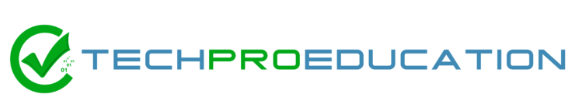

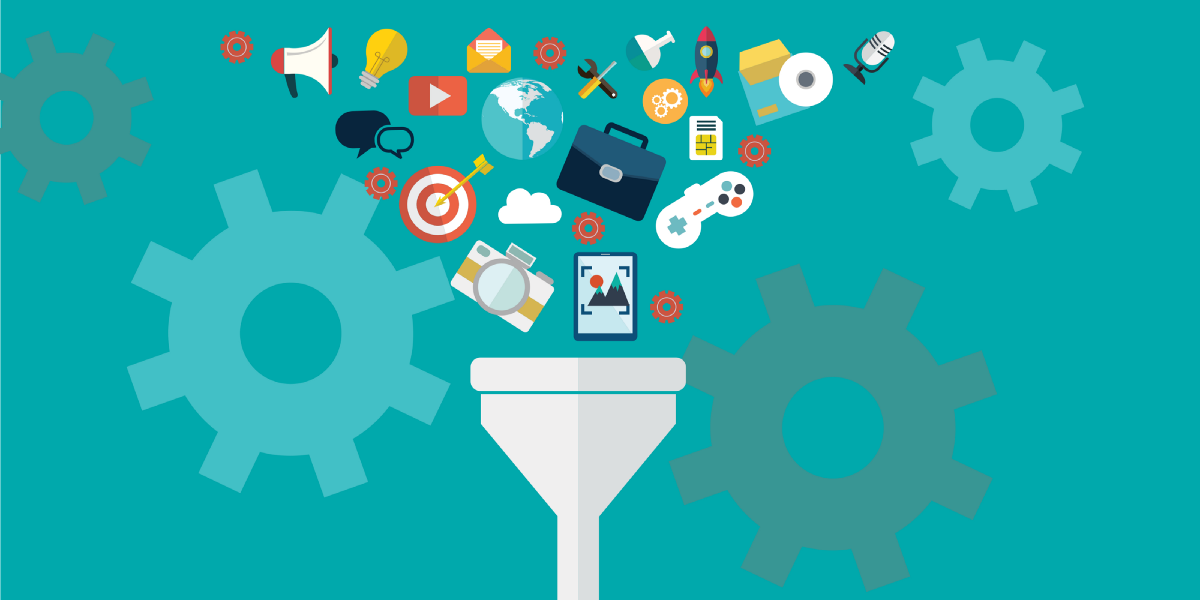

## Preprocessing of Data
- Train | Test Split, Scalling

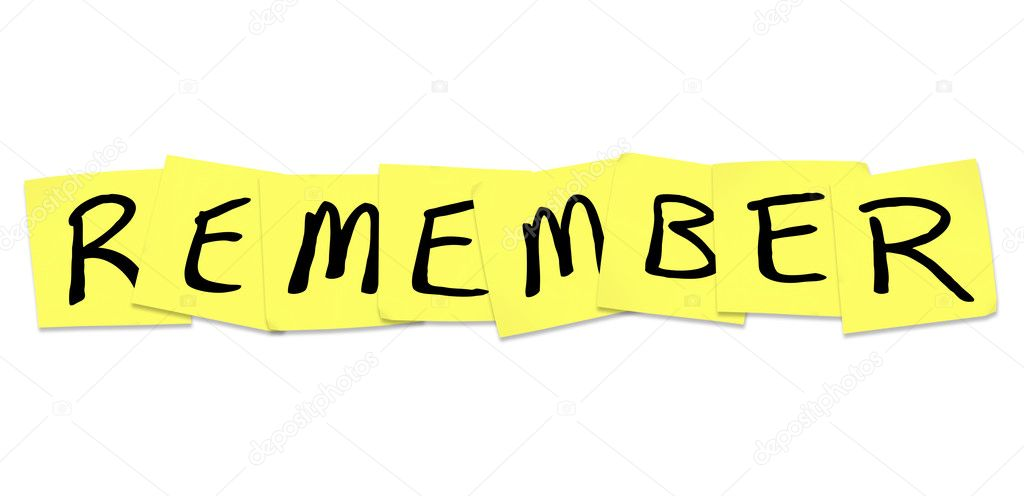

**NumPy**, çok boyutlu dizileri (array) yönetmek için kullanılan bir kütüphanedir. NumPy, özellikle matematiksel işlemler için optimize edilmiştir ve büyük veri kümeleriyle verimli bir şekilde çalışabilir. NumPy dizileri, bellek kullanımını en aza indirgemek için verileri sıkıştırır ve çok hızlı işlem yapmak için optimize edilmiştir.

**Dataframe** ise, tablo verilerini işlemek için kullanılan bir yapıdır. Pandas kütüphanesi tarafından sağlanır. DataFrame, verileri satırlar ve sütunlar halinde düzenler ve verileri etiketli olarak depolar. DataFrame, birçok veri işleme görevi için kullanışlıdır, özellikle verileri filtrelemek, sıralamak, birleştirmek, gruplamak ve birçok farklı yolla dönüştürmek için kullanılabilir.

**DataFrame ve NumPy arasındaki farklar şunlardır:**

DataFrame, verileri etiketli olarak depolarken, NumPy dizileri, verileri sıralı olarak depolar.

DataFrame, verileri farklı tiplerde sütunlar halinde depolarken, NumPy dizileri aynı tipte verileri depolar.

Birçok veri bilimci, genellikle veri ön işleme işlemlerinde DataFrame kullanırken, model eğitimi ve tahmininde NumPy dizilerini kullanmayı tercih eder.(daha hızlı ve verimli bir şekilde işlenebildiği için)

Yapay sinir ağları (ANN), sıklıkla girdi olarak NumPy dizilerini kullanır ve bu nedenle, bir DataFrame'deki sütunları bir NumPy dizisine dönüştürmek, verileri yapay sinir ağı modeline girdi olarak verebilmek için gereklidir.

Ancak, diğer makine öğrenimi modelleri (örneğin, karar ağaçları veya destek vektör makineleri), DataFrame üzerinde doğrudan çalışabilir ve bu nedenle, verileri bir NumPy dizisine dönüştürmek zorunda kalmazsınız. Bu nedenle, yapmanız gereken şey, veri yapınıza ve kullandığınız makine öğrenimi modeline bağlıdır.

In [9]:
from sklearn.model_selection import train_test_split

**X = df[['feature1', 'feature2']].values  
y = df['price'].values**

yukarıda ki **"values"** işlemi ile numpy dizi dönüşümünü gerçekleştirmiş oluruz ancak **train_test_split** ve **scaling** işlemleriyle ile bu dönüşüm otamatik yapılmaktadır. Final modelde de train test ayrımı yapmadan X ile modeli eğiteceğimiz için bu numpy dönüşümünü şimdiden burda gerçekleştirebiliriz.

In [10]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [11]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [12]:
y

array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
X_train.shape

(700, 2)

In [15]:
X_test.shape

(300, 2)

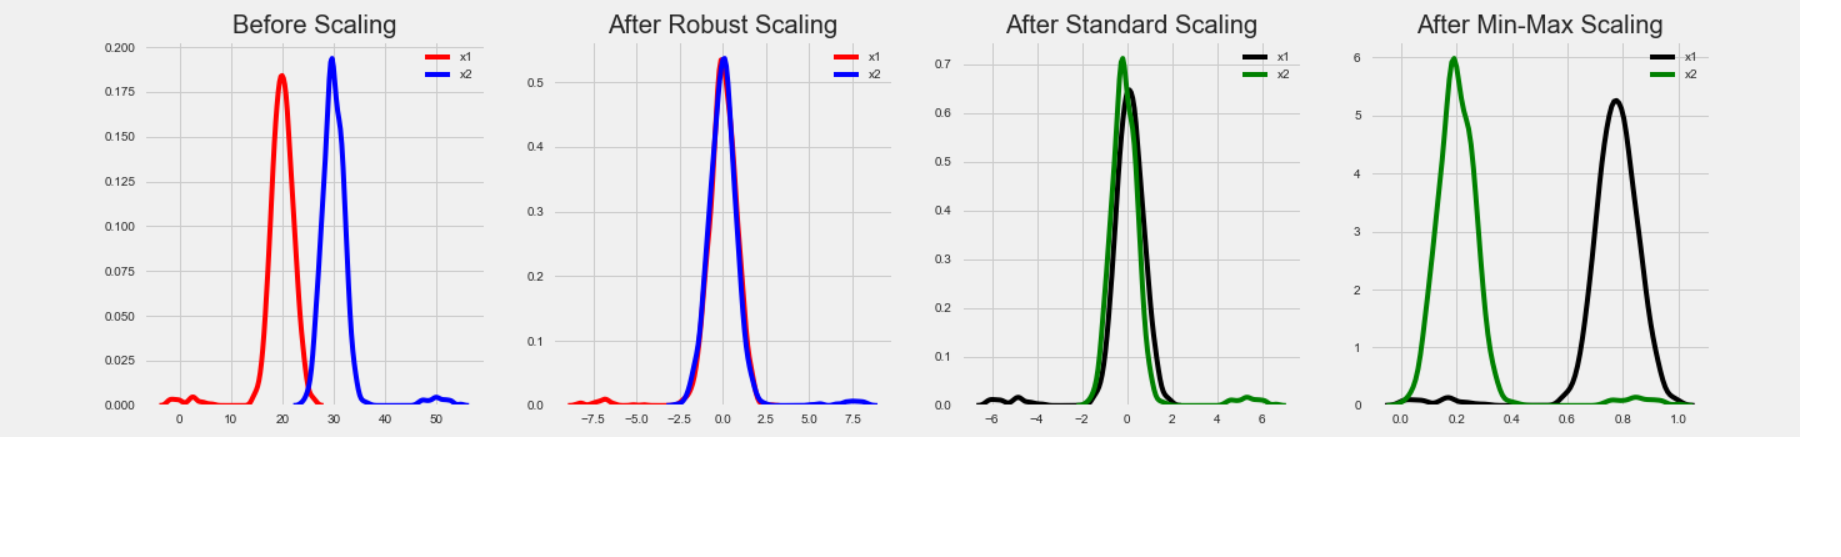

**Min-Max Scaler:** Bu yöntem, verileri belirli bir aralığa indirger. Verileri minimum ve maksimum değerleri arasında belirli bir aralığa ölçeklendirerek yapılır. Bu yöntem, genellikle 0 ile 1 arasında ölçeklendirme yapmak için kullanılır.

**Standard Scaler:** Bu yöntem, verilerin ortalamasını 0 ve standart sapmasını 1 olarak ölçeklendirir. Verilerin dağılımını merkezileştirerek yapılır. Bu yöntem, genellikle verilerin normal dağıldığı durumlarda kullanılır.

**Robust Scaler:** Bu yöntem, verilerin ortanca değerini 0 ve yüzdelik aralığını belirli bir aralığa indirger. Verilerin dağılımını merkezileştirerek yapılır. Bu yöntem, verilerde aykırı değerlerin olduğu durumlarda kullanılır.


**Not==>** Genelde DL çalışmalarımızda Min-Max Scaler'ı tercih ediyoruz. Çünkü işlem yükü fazla girdileri 0-1 arasında tutuyoruz

In [16]:
from sklearn.preprocessing import MinMaxScaler 

In [17]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [18]:
scaler = MinMaxScaler() 

In [19]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train.max()

1.0

In [21]:
X_train.min()

0.0

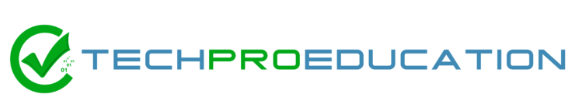

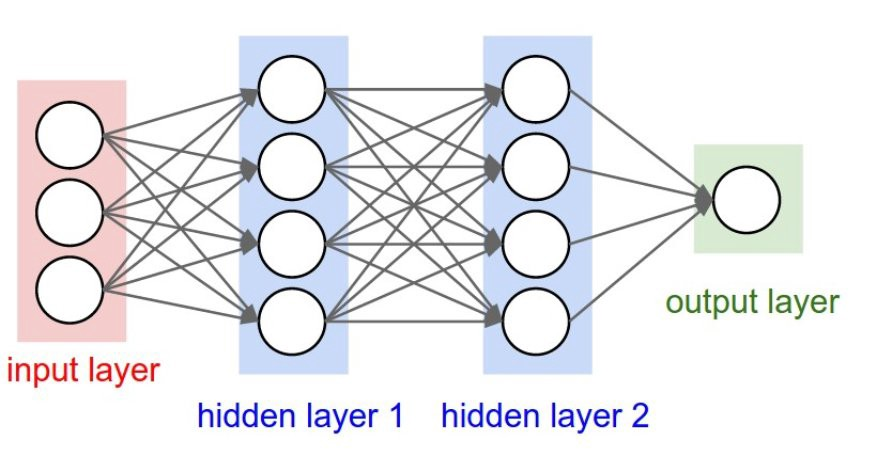

## Modelling

In [26]:
import tensorflow as tf

In [27]:
from keras import models

In [28]:
from tensorflow.keras.layers import Dense, Activation

In [29]:
from tensorflow.keras.models import Sequential


In [30]:
help(Sequential) # arka arkaya katman oluşturmamı sağlayan yapıdır. ilk olarak modeli squental olarak tanımlarız.

Help on class Sequential in module keras.src.models.sequential:

class Sequential(keras.src.models.model.Model)
 |  Sequential(layers=None, trainable=True, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `Model`.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = keras.Sequential()
 |  model.add(keras.layers.Dense(8))
 |  model.add(keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = keras.Sequential()
 |  model.add(keras.Input(shape=(16,)))
 |  model.add(keras.layers.Dense(8))
 |  len(model.weights)  # Returns "2"
 |  
 |  # When u

In [31]:
help(Dense) # katman (layer) 

Help on class Dense in module keras.src.layers.core.dense:

class Dense(keras.src.layers.layer.Layer)
 |  Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, lora_rank=None, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).

**Sequential** sınıfı, bir modelin katmanlarını birbirine sırayla eklemek için kullanılan bir sınıftır. Bu şekilde, her katmanın çıkışı, bir sonraki katmanın girdisi olarak kullanılabilir. Bu da model oluşturmayı kolaylaştırır.

**Dense** ise, tam bağlı bir katman oluşturmak için kullanılan bir sınıftır. Tam bağlı katmanlar, önceki katmanın tüm çıktılarının sonraki katmana girdi olarak aktarıldığı katmanlardır.

Yani Sequential sınıfı, bir modelin katmanlarını sırayla eklemek için kullanılırken, Dense sınıfı, bir tam bağlı katman oluşturmak için kullanılır. Sequential sınıfında, her katman Dense sınıfı ile oluşturulabilir.

In [32]:
# First way to create model

model = Sequential([Dense(units = 4, input_dim=2, activation = "relu"),  # her bir dense bir layer'i  tanımlar 
                    Dense(units = 4, activation = "relu"),               # units kaç nöron olduğunu söyler
                    Dense(units = 4, activation = "relu"),               # activation fonksiyonu Relu, tanh da seçilebilir
                    Dense(units = 1)])                                   # output layer - regression problemi olduğu için 1 output var.

**input_dim**, bir sinir ağı modelinin ilk katmanında kaç tane girdi değişkeni (input) olduğunu belirtmek için kullanılan bir parametredir. Burda biz input sayısını bildiğimiz için girdik ancak girmesek de model kendisi tespit edebiliyor

**units**, nöron sayısını belirtir, kesin bir kural yok ama 4,8,16,32,64,128... şeklinde tavsiye edilir, best practice yaklaşımı sergilenebilir

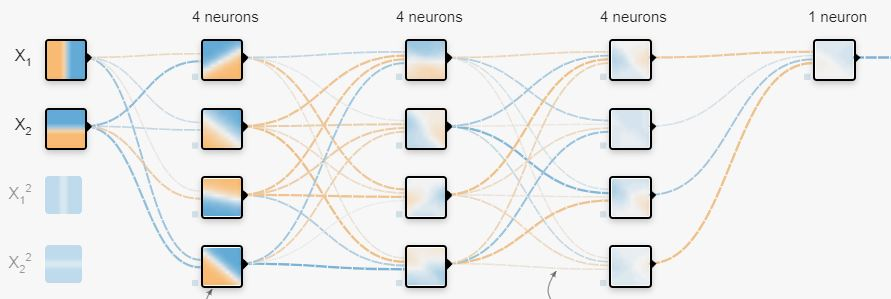

In [33]:
# Second way to create model (tavsiye edilen yöntem - genelde kaynaklarda karşımıza bu formda çıkar)

model = Sequential()
model.add(Dense(units = 8, input_dim = X_train.shape[1], activation = "relu"))     
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1))                             

X_train veri kümesinin sütun sayısı, yani özellik sayısı input_dim değişkenine atanıyor. Yani modele giren her bir veri örneği, input_dim boyutunda bir vektör olacak. Bu sayede model, girdi olarak beklenen boyutta bir vektör aldığını biliyor ve bu boyuttaki vektörler üzerinden işlem yaparak çıktı üretiyor. X_train.shape[1] ifadesi, X_train veri kümesinin boyutunu (n_samples, n_features) şeklinde veren bir NumPy dizisi döndürür. Burada n_features özellik sayısını temsil eder ve X_train.shape[1] ifadesi bu değere eşittir.

In [34]:
# Third way without input_dim

model = Sequential()

model.add(Dense(units = 4, activation = "relu"))     
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1)) 

In [36]:
model.compile(optimizer="rmsprop", loss="mse")

# model kuruldu bu model nasıl çalışacak onu burada belirleriz
# optimizer min cost bulur geriye doğru optimize eder. rmsprop veya adam kullanılabilir
# loss function regression probleminde genelde mse kullanılır 

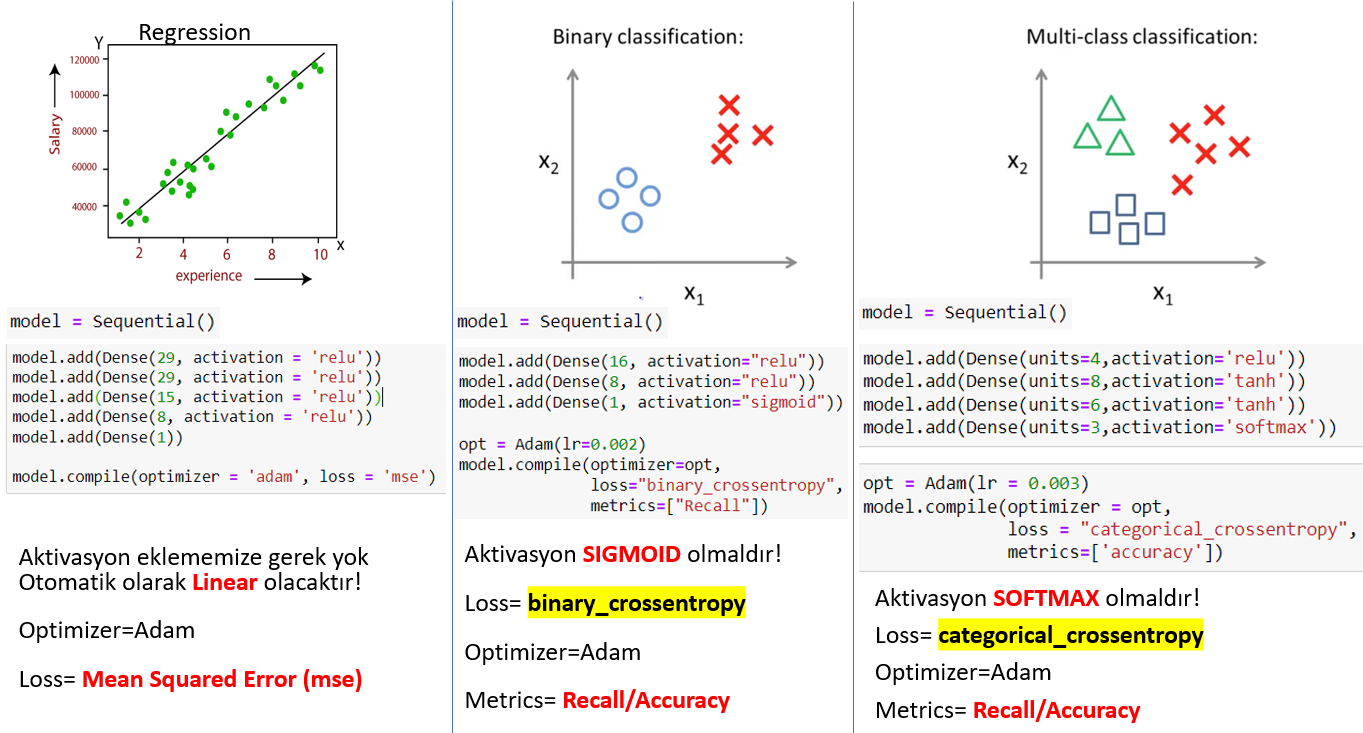

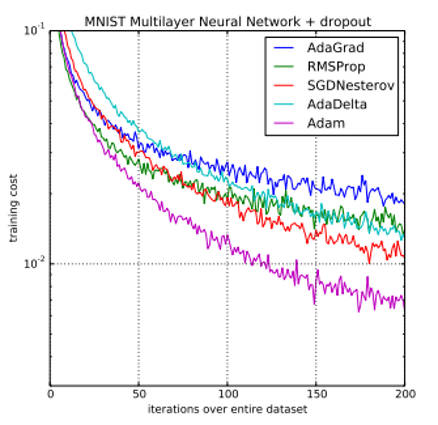

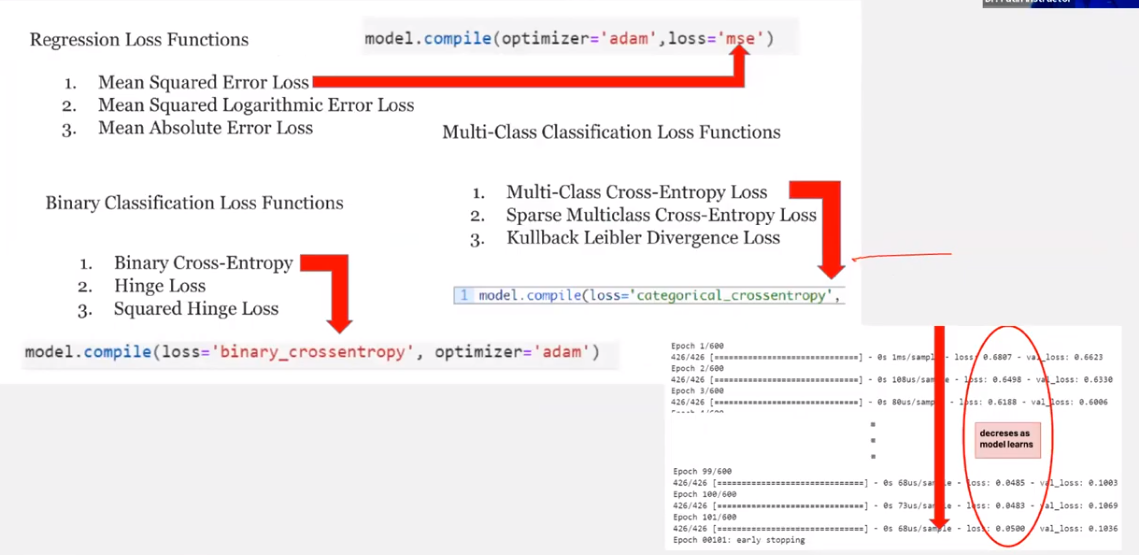

ölçeklendirilmiş X_train verileri, modelin fit() yöntemi aracılığıyla eğitilir. y_train ise hedef değişkenidir ve modelin öğrenmesi gereken çıktılardır. 

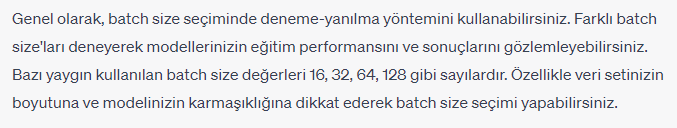

In [38]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 1) 

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 258548.7188   


In [39]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 350) 

Epoch 1/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257582.3125 
Epoch 2/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 253450.6094 
Epoch 3/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 254458.0938 
Epoch 4/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 254879.7969 
Epoch 5/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 262032.6562
Epoch 6/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 254133.3594
Epoch 7/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 257212.7969
Epoch 8/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 260340.8281 
Epoch 9/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258220.9688 
Epoch 10/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257504.0625 
Epoch 11/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 250447.0156 
Epoch 12/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 251249.3125 
Epoch 13/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 252953.7500 
Epoch 14/350
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - l

In [37]:
model.weights 

[<KerasVariable shape=(2, 4), dtype=float32, path=sequential_2/dense_8/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_8/bias>,
 <KerasVariable shape=(4, 4), dtype=float32, path=sequential_2/dense_9/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_9/bias>,
 <KerasVariable shape=(4, 4), dtype=float32, path=sequential_2/dense_10/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_10/bias>,
 <KerasVariable shape=(4, 1), dtype=float32, path=sequential_2/dense_11/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_2/dense_11/bias>]

**Bir epoch tamamlandığında, tüm batch'lerin loss değerlerinin ortalaması, epoch loss değerini oluşturur.**

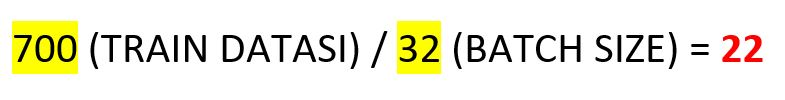

Iterasyon sayısı, veri kümesindeki örnek sayısının batch boyutuna bölünmesiyle hesaplanabilir. Bu durumda:

700 veri örneği ve 32'lik batch boyutu olduğu için iterasyon sayısı şu şekilde hesaplanır:

700 / 32 = 21.875

Batch boyutu tam sayı olması gerektiğinden, son iterasyonda kalan örnekler için ek bir iterasyon yapılır. Yani toplam iterasyon sayısı 22 olacaktır.

In [38]:
model.summary() # her katmanda kaç parametre olduğunu verir 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116 (468.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59 (240.00 B)

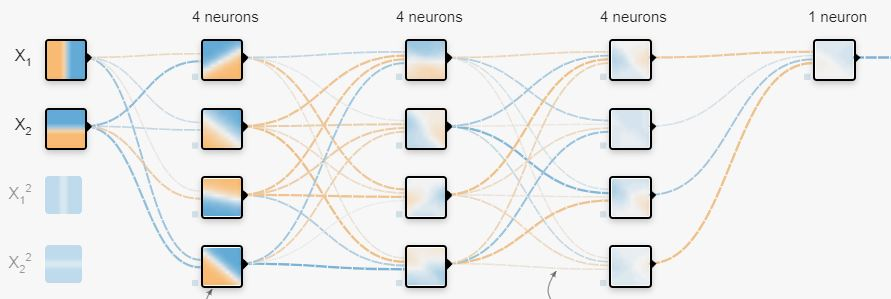

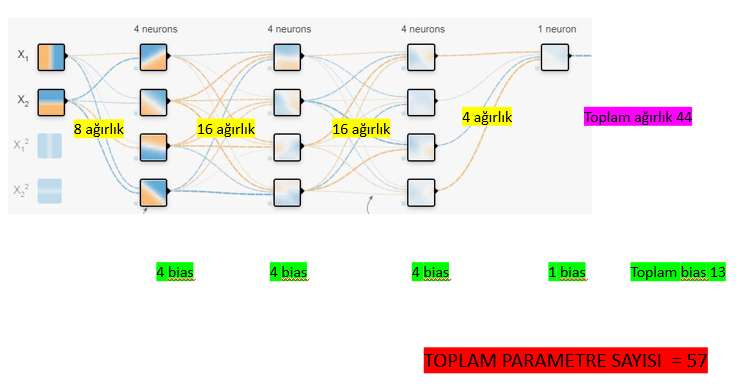

"model.weights" ifadesi, eğitim sonucu elde edilen ağırlıkları içerir. İlk verilen ağırlıkların (genellikle rastgele atanan ağırlıkların) saklanması için ayrı bir işlev kullanmanız gerekir.

Bir ANN modeli oluşturduğunuzda, başlangıçta modeldeki ağırlıklar genellikle rastgele atanır. Bu rastgele atanan ağırlıklar, modelin giriş verilerini kullanarak tahminler yapmasını sağlar. Ancak, tahminlerin çoğu zaman yanlış olacağından, model eğitim verileriyle beslenir ve eğitim sırasında ağırlıklar yavaş yavaş ayarlanarak daha iyi tahminler yapması sağlanır. Eğitim bittiğinde, modelin son ağırlıkları, eğitim verilerine en iyi uyacak şekilde ayarlanmış olan ağırlıklardır.

Keras'ta, bir modelin ağırlıklarına erişmek için get_weights() yöntemini kullanabilirsiniz. Bu yöntem, bir numpy dizisi olarak ağırlıkların ve biasların bir listesini döndürür. Eğitim öncesi ağırlıkların elde edilmesi için, model eğitilmeden önce get_weights() yöntemi çağrılabilir ve ağırlıklar kaydedilebilir. Bu ağırlıklar daha sonra eğitim sonrası ağırlıklarla karşılaştırılabilir. Alternatif olarak, modelin ağırlıklarını kaydetmek için save_weights() yöntemi kullanılabilir ve eğitim öncesi ağırlıkların kaydedilmiş bir sürümü yine load_weights() yöntemi ile geri yüklenebilir.

In [39]:
model.get_weights()

[array([[ 1.9493465 , -0.884779  , -0.98931956,  2.3694706 ],
        [ 4.9761205 , -0.73978066, -0.7852695 ,  3.4595098 ]],
       dtype=float32),
 array([0.8715079 , 0.        , 0.        , 0.87004966], dtype=float32),
 array([[ 3.5148714 ,  0.20873804,  3.2271924 , -0.5817912 ],
        [ 0.67703694,  0.15490943, -0.4416934 , -0.28349042],
        [ 0.35140198, -0.62539494, -0.2069698 , -0.34153843],
        [ 3.1999328 , -0.5261515 ,  1.8484688 , -0.7096431 ]],
       dtype=float32),
 array([ 0.84738934, -0.21424785,  0.8445543 ,  0.        ], dtype=float32),
 array([[-0.20016219, -0.2143811 , -0.57148445,  3.126775  ],
        [ 0.6926949 , -0.752836  ,  0.04618504, -0.16389088],
        [ 0.09582649, -0.8436933 ,  0.7302829 ,  3.1787806 ],
        [-0.5216578 ,  0.6558705 , -0.76856226,  0.51735586]],
       dtype=float32),
 array([-0.07129852,  0.        , -0.07473442,  0.8391291 ], dtype=float32),
 array([[-0.37965572],
        [ 0.5134711 ],
        [-0.76600367],
        [ 3.

In [40]:
model.weights                                    

[<KerasVariable shape=(2, 4), dtype=float32, path=sequential_2/dense_8/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_8/bias>,
 <KerasVariable shape=(4, 4), dtype=float32, path=sequential_2/dense_9/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_9/bias>,
 <KerasVariable shape=(4, 4), dtype=float32, path=sequential_2/dense_10/kernel>,
 <KerasVariable shape=(4,), dtype=float32, path=sequential_2/dense_10/bias>,
 <KerasVariable shape=(4, 1), dtype=float32, path=sequential_2/dense_11/kernel>,
 <KerasVariable shape=(1,), dtype=float32, path=sequential_2/dense_11/bias>]

* Eğer sadece modelinizin ağırlıklarını bir Numpy dizileri listesi olarak almak istiyorsanız: model.weights kullanabilirsiniz.

* Eğer modelinizin her bir katmanının ağırlıklarına ayrı ayrı erişmek istiyorsanız: model.get_weights() kullanabilirsiniz.

In [41]:
model.history.history # model eğitilirken çıkan loss değerlerini verir

{'loss': [256354.984375,
  256235.359375,
  256182.234375,
  255872.65625,
  255660.9375,
  255473.203125,
  255321.8125,
  254791.5,
  254753.515625,
  254262.546875,
  253983.8125,
  253595.140625,
  253049.59375,
  252607.40625,
  252098.40625,
  251632.25,
  251182.765625,
  250632.140625,
  249989.296875,
  249316.203125,
  248500.203125,
  247832.5625,
  246902.234375,
  246224.65625,
  245278.515625,
  244053.015625,
  243104.390625,
  241943.6875,
  241010.390625,
  239556.953125,
  238555.890625,
  236994.4375,
  235808.859375,
  234255.8125,
  232697.140625,
  230917.59375,
  229134.546875,
  227555.546875,
  225509.296875,
  223660.5,
  221751.15625,
  219402.296875,
  217434.046875,
  214854.296875,
  212703.890625,
  210227.203125,
  207576.859375,
  204930.90625,
  202221.109375,
  199353.265625,
  196449.234375,
  193376.34375,
  190299.6875,
  186914.9375,
  183668.796875,
  180199.8125,
  176873.359375,
  173129.25,
  169371.515625,
  165728.515625,
  161706.953125,
  

model.history.history özelliği, modelin eğitim işlemi sırasında kaydedilen tüm değerleri içeren bir dictionary'dir. Bu değerler, eğitim sırasında kaydedilen loss (veya başka bir metrik) değerlerini içerir. Bu dictionary, eğitim sırasında kaydedilen her epoch için bir girdiye sahiptir.

pd.DataFrame(model.history.history) kodu, bu dictionary'i Pandas DataFrame formatında gösterir. Bu kodu çalıştırarak, eğitim sırasında kaydedilen her epoch için loss değerlerini daha düzenli ve okunaklı bir şekilde görebilirsiniz. Her bir epoch'un değerleri, DataFrame'deki her bir satırda görüntülenir.

In [42]:
pd.DataFrame(model.history.history)

,loss
0,256354.984
1,256235.359
2,256182.234
3,255872.656
4,255660.938
5,255473.203
6,255321.812
7,254791.500
8,254753.516
9,254262.547


<Axes: >

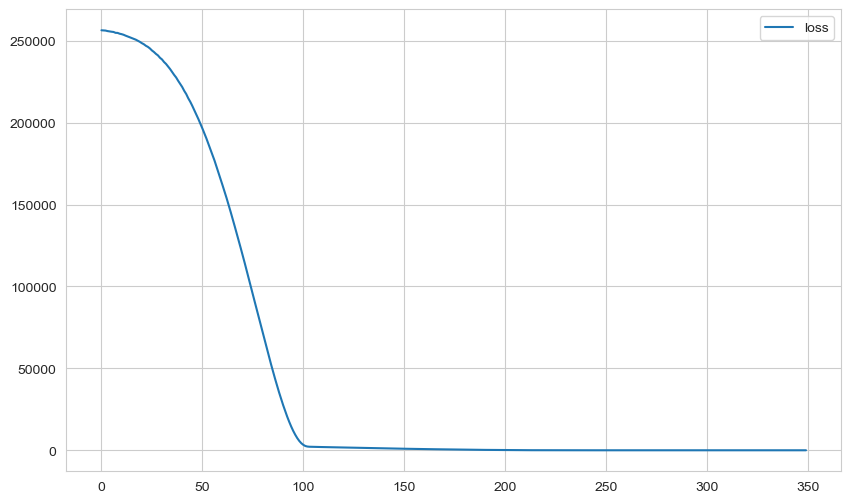

In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()


(0.0, 3000.0)

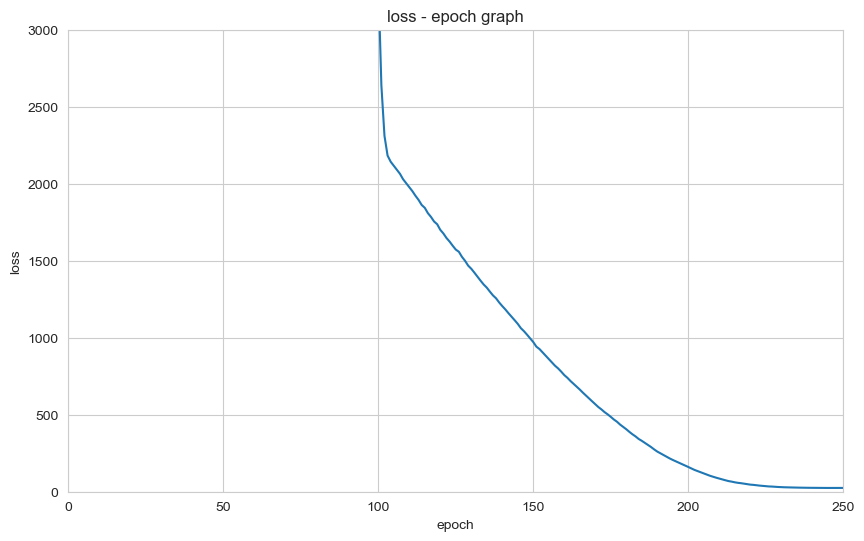

In [44]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

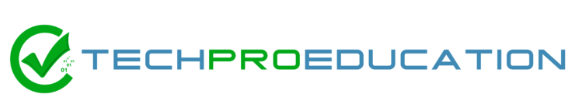

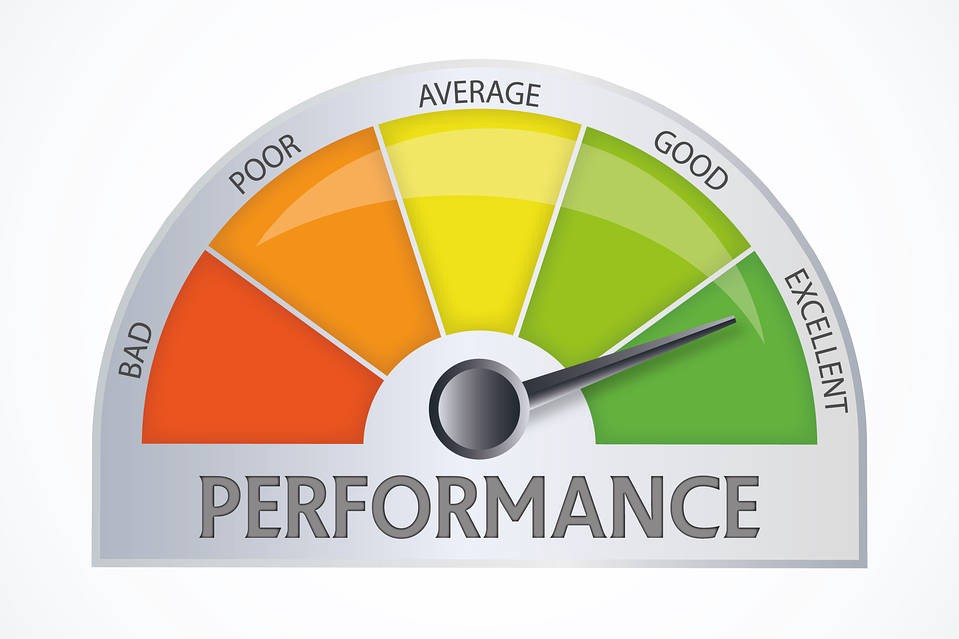

## Model Performance

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [46]:
model.evaluate(X_train, y_train, verbose=0)  # model oluştururken loss'a hangi skoru verdiysem onun sonucunu verir. "mse"
                                             # arka planda x ve y testi predict alıp sonra evaluate sonucunu veriyor

25.41655158996582

In [47]:
model.evaluate(X_test, y_test, verbose=0)      # eğitilen modelin test verileri üzerinde ki performansı

25.64469337463379

In [48]:
model.evaluate(X_test, y_test, verbose=2)

10/10 - 0s - 12ms/step - loss: 25.6447


25.64469337463379

In [49]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [50]:
explained_variance_score(y_test, y_pred)     # R2 skorunu verir 1 e yakınsa iyidir

0.9971671358883764

Bu kod bloğu, bir makine öğrenmesi modelinin test verileri üzerindeki tahminlerinin doğruluğunu ölçmek için kullanılan bir metrik olan "explained variance score" (açıklanan varyans skoru) hesaplamak için kullanılır.

In [51]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

# gerçek ve tahmin değerlerini kıyaslarız

,Actual,Pred
49,478.358,484.484
268,548.614,542.216
271,444.945,447.114
48,316.951,317.803
93,438.265,434.375
178,606.297,599.946
161,512.371,505.688
215,599.991,601.353
91,438.977,438.573
297,612.728,608.572


<Axes: xlabel='Actual', ylabel='Pred'>

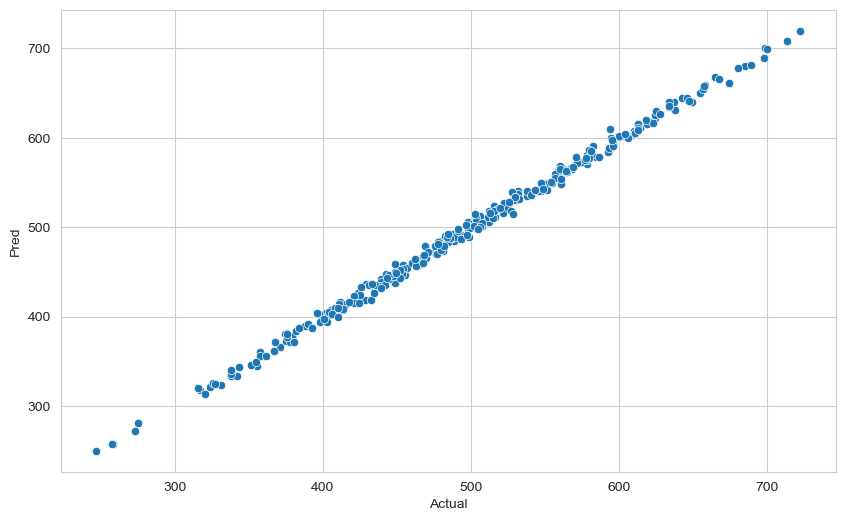

In [52]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

Bu kod bloğu, gerçek ve tahmin edilen değerler arasındaki ilişkiyi gösteren bir saçılım grafiği oluşturur. Eğer model doğru tahminler yapmışsa, saçılım grafiğindeki noktaların bir çizgiye yakın bir şekilde yerleşeceği beklenir.

In [53]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [54]:
eval_metric(y_test, y_pred)

r2_score: 0.9970805165626557 
mae: 4.0583831454207715 
mse: 25.668190827778826 
rmse: 5.0663784726152095


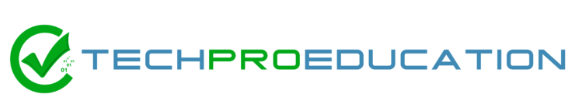

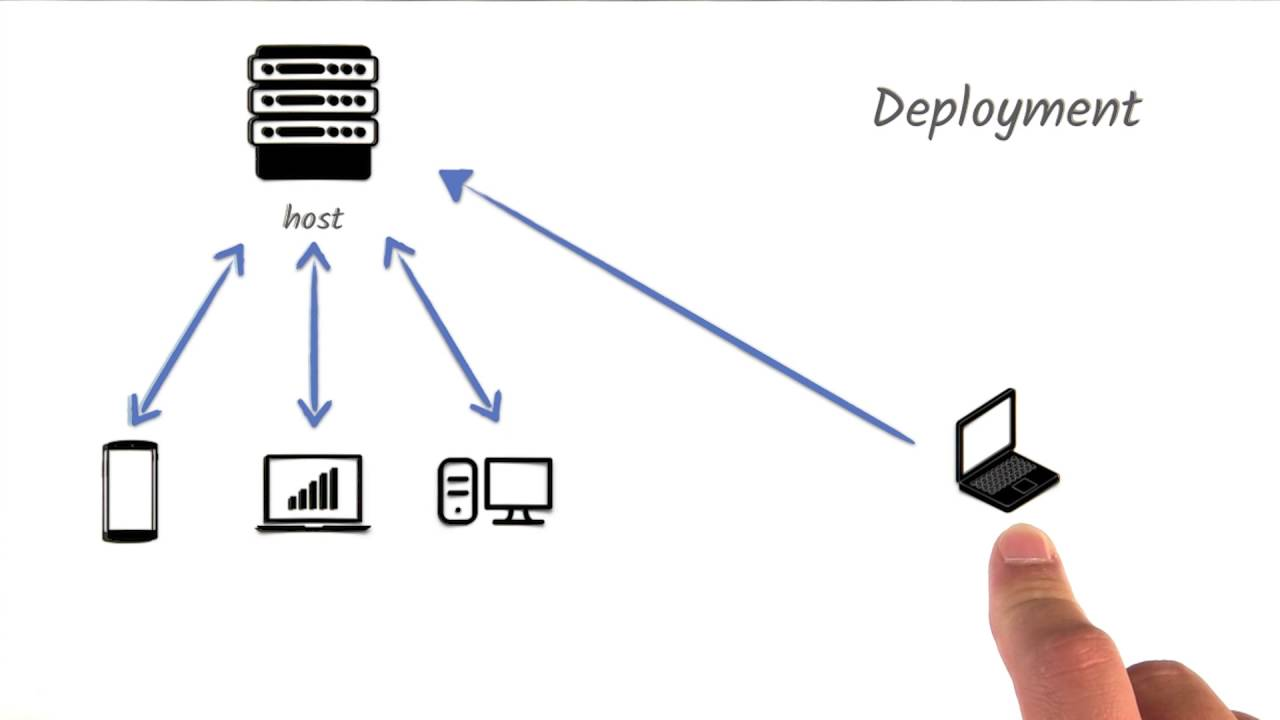

## Final Model and Model Deployment

In [55]:
scaler = MinMaxScaler().fit(X)    # Final modelde, veri ölçeklendirmesi yapılması gerekir.

In [56]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

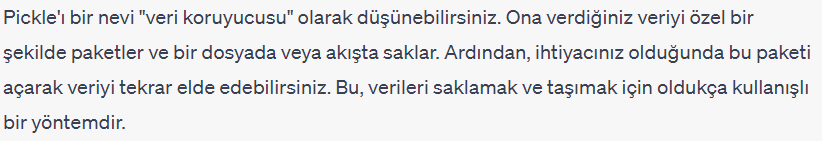

Python'da pickle modülünü kullanarak bir MinMaxScaler nesnesini ("scaler" adıyla) seri hale getirip, "scaler_fake_reg" adlı bir dosyaya yazmayı amaçlar. Bu, modeli tekrar kullanmak istediğimizde, ölçekleyici nesnesini yeniden yükleyebilmemize olanak tanır.

In [57]:
X_scaled = scaler.transform(X)

Final modelde, MinMaxScaler kullanarak veri ölçeklendirme işlemi yapıldıktan sonra, verilerin ölçeklendirilmiş sürümünün elde edilmesi gerekir. Bu, modelin eğitim verileri üzerinde eğitilirken ölçeklenmiş verileri kullanmasını sağlar ve aynı ölçeklendirme işlemi test verileri üzerinde uygulandığında tutarlılık sağlar.

Bu nedenle, "scaler" nesnesi ile "transform" fonksiyonu kullanılarak, "X" veri kümesinin ölçeklendirilmiş sürümü olan "X_scaled" elde edilir. Bu, her özellik için verilerin orijinal aralığını korurken, özelliklerin benzer aralıklarda olmasını sağlar.

In [58]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[0]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 255551.0469
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 259887.9375
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 257376.5156
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 252922.5156
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 255383.1562
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 253822.8594
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 257152.7812
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 254387.5156
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 255842.3125
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 254230.7656
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 249333.4531
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 249777.6094
Epoch 13/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 248199.0625
Epoch 14/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 251428.5312
E

In [59]:
final_model.save('my_model.h5')                  
# Önceden H5 ile kaydederken yeni güncellemede H5 uzantısı çalışmamaya başladı. Bu problemi keras uzantısı ile çözdük
# alttaki uyarıda da H5 uzantısının eski bir yöntem olduğu belirtiliyor

In [60]:
from tensorflow.keras.saving import save_model

save_model(final_model, 'my_model.keras')

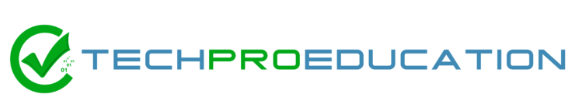

# Prediction-1

In [61]:
from tensorflow.keras.models import load_model

model_fake_reg = load_model('my_model.keras')

In [62]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

Bu kod, Python'da pickle modülünü kullanarak bir dosyadan (genellikle bir önceki çalışmada kaydedilen) bir nesnenin yüklenmesini sağlar. Buradaki örnek, "scaler_fake_reg" adlı bir dosyadan bir scaler nesnesini yüklemeyi amaçlar.

In [63]:
sample = [[998, 1000]]    # Manuel bir örnek veri oluşturalım

In [64]:
sample_scaled = scaler_fake_reg.transform(sample)     # bu örneği ölçeklendirelim

In [65]:
model_fake_reg.predict(sample_scaled)                 # bu örneği predict edelim

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


array([[420.00394]], dtype=float32)

# Prediction-2

In [70]:
my_dict = {"Feature1": [1020, 1908, 999, 1000, 1001],   # birden fazla değerrleride pred yapabiliriz.
           "Feature2": [1000, 999, 998, 997, 998]}      # scale yaptığımızdan array olarak sonuç vereceği için array a çevirmeye gerek yok

In [71]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,1020,1000
1,1908,999
2,999,998
3,1000,997
4,1001,998


In [72]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[3.73060091e+00, 5.29806193e-01],
       [1.48130555e+02, 3.53459774e-01],
       [3.15737133e-01, 1.77113355e-01],
       [4.78349694e-01, 7.66936000e-04],
       [6.40962255e-01, 1.77113355e-01]])

In [73]:
model_fake_reg.predict(sample_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[ 1304.0958 ],
       [36900.715  ],
       [  283.0937 ],
       [  234.73155],
       [  363.46564]], dtype=float32)

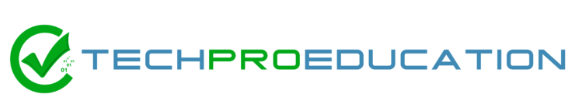